In [1]:
from google.colab import files
uploaded=files.upload()

Saving wine.csv to wine.csv


# Task 1: Exploratory Data Analysis (EDA)

DF INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

DF DESCRIPTION
             Type     Alcohol       Malic         Ash  Alcalinity   Mag

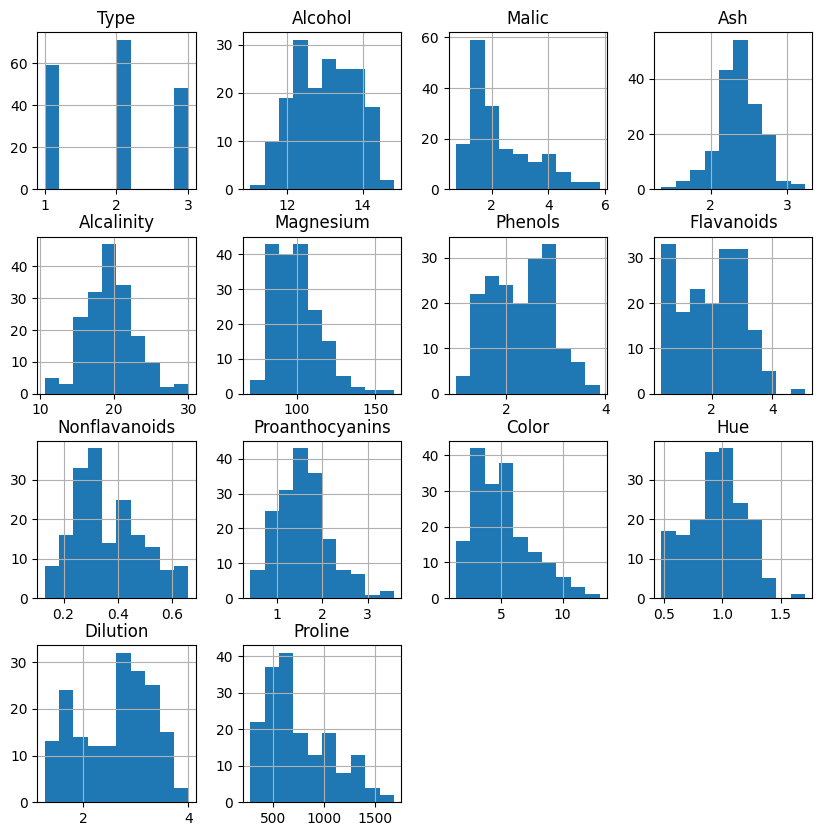


CORRELATION MATRIX 


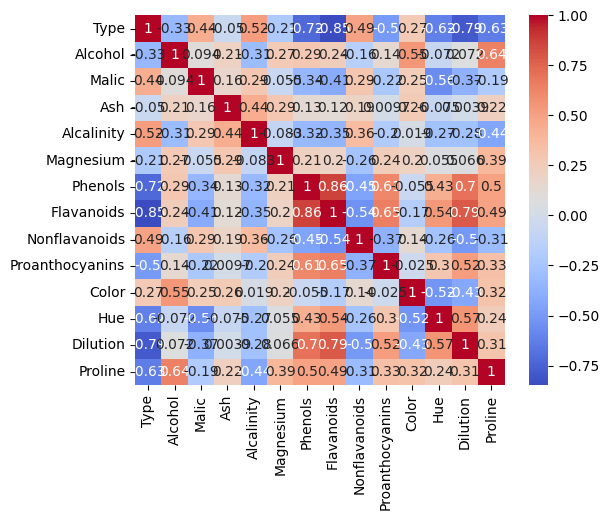

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df= pd.read_csv('wine.csv')
df.head()

# Basic data exploration
print("DF INFORMATION")
print(df.info())
print("\nDF DESCRIPTION")
print(df.describe())

# Examine the distribution of features using histograms
print("\nHISTOGRAMS")
df.hist(figsize=(10, 10))
plt.show()

# Investigate correlations between features
print("\nCORRELATION MATRIX ")
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.tight_layout
plt.show()

# Task 2: Dimensionality Reduction with PCA

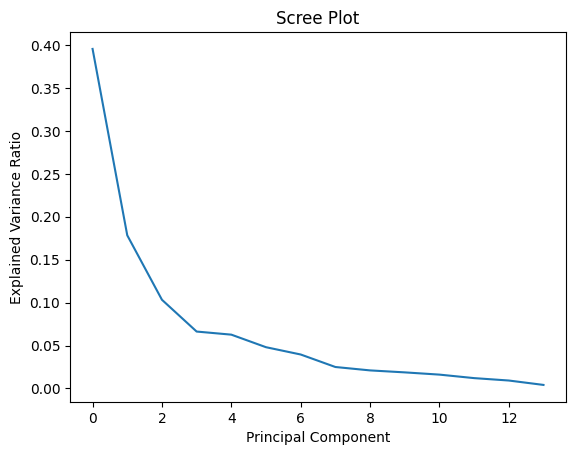

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# Implement PCA to reduce the dimensionality of the dataset
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

# Determine the optimal number of principal components using scree plot
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.show()

# Select the optimal number of principal components (e.g, 3)
n_components = 3
pca = PCA(n_components=n_components)
df_pca = pca.fit_transform(df_scaled)

# Task 3: Clustering with Original Data

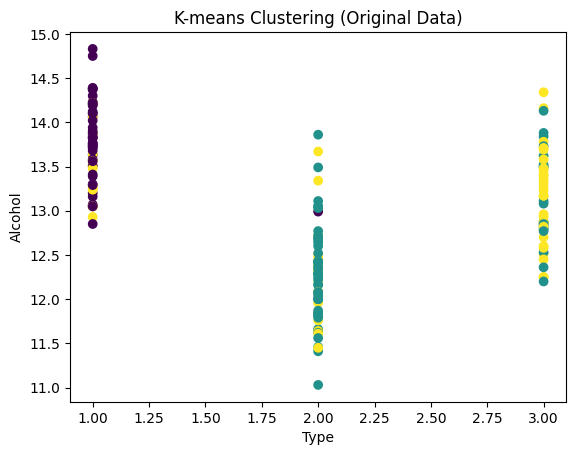

Silhouette score: 0.571


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Apply K-means clustering to the original dataset
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

# Visualize the clustering results
# Accessing the columns using their names or the .iloc indexer
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kmeans.labels_)
# Alternatively, if you know the column names, use them directly:
# plt.scatter(df['column_name_1'], df['column_name_2'], c=kmeans.labels_)
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.title('K-means Clustering (Original Data)')
plt.show()

# Evaluate the clustering performance using silhouette score
silhouette = silhouette_score(df, kmeans.labels_)
print(f'Silhouette score: {silhouette:.3f}')

# Task 4: Clustering with PCA Data

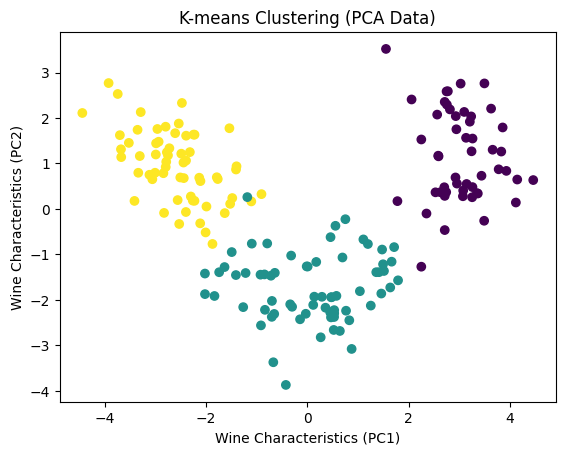

Silhouette score (PCA): 0.488


In [5]:
# Apply K-means clustering to the PCA-transformed dataset
kmeans_pca = KMeans(n_clusters=3)
kmeans_pca.fit(df_pca)

# Visualize the clustering results
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans_pca.labels_)
plt.xlabel('Wine Characteristics (PC1)')
plt.ylabel('Wine Characteristics (PC2)')
plt.title('K-means Clustering (PCA Data)')
plt.show()

# Evaluate the clustering performance using silhouette score
silhouette_pca = silhouette_score(df_pca, kmeans_pca.labels_)
print(f'Silhouette score (PCA): {silhouette_pca:.3f}')

# Task 5: Comparison and Analysis

In [6]:
# Compare the clustering results
print(f'Original data silhouette score: {silhouette:.3f}')
print(f'PCA data silhouette score: {silhouette_pca:.3f}')

# Analyze the trade-offs between using PCA and clustering directly on the original dataset
print('\nUsing PCA can help reduce the dimensionality of the dataset, which can improve clustering performance.')
print('However, PCA may lose some important information in the original dataset.')

Original data silhouette score: 0.571
PCA data silhouette score: 0.488

Using PCA can help reduce the dimensionality of the dataset, which can improve clustering performance.
However, PCA may lose some important information in the original dataset.


# Task 6: Conclusion and Insights

In [7]:
# Summarize the key findings and insights
print('In this assignment, we explored the wine dataset using PCA and K-means clustering.')
print('\nWe found that PCA can help reduce the dimensionality of the dataset and improve clustering performance.')
print('However, the choice of using PCA or clustering directly on the original dataset depends on the specific problem and dataset.')

# Discuss the practical implications of using PCA and clustering in data analysis
print('\nPCA and clustering are powerful techniques in data analysis, but they require careful consideration of the dataset and problem at hand.')
print('By applying these techniques thoughtfully, we can gain valuable insights into the structure and patterns in the data.')

# Provide recommendations for when to use each technique
print('\nUse PCA when:')
print('\n- The dataset has a high dimensionality.')
print('- The features are highly correlated.')
print('\nUse clustering directly on the original dataset when:')
print('\n - The dataset has a low dimensionality.')
print(' - The features are not highly correlated.')

In this assignment, we explored the wine dataset using PCA and K-means clustering.

We found that PCA can help reduce the dimensionality of the dataset and improve clustering performance.
However, the choice of using PCA or clustering directly on the original dataset depends on the specific problem and dataset.

PCA and clustering are powerful techniques in data analysis, but they require careful consideration of the dataset and problem at hand.
By applying these techniques thoughtfully, we can gain valuable insights into the structure and patterns in the data.

Use PCA when:

- The dataset has a high dimensionality.
- The features are highly correlated.

Use clustering directly on the original dataset when:

 - The dataset has a low dimensionality.
 - The features are not highly correlated.


# Exploration on hierarchical( dendrograms) clustering algorithm

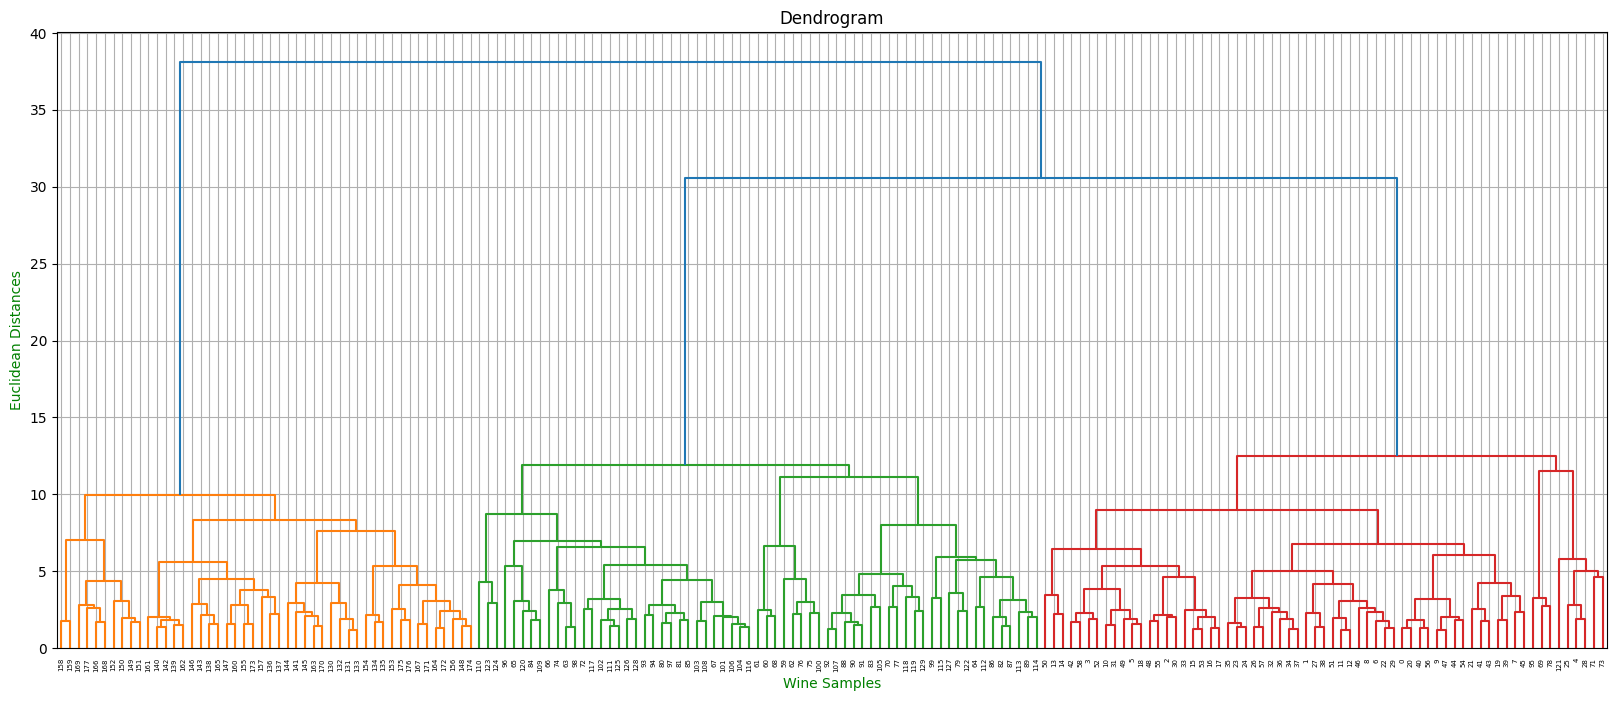

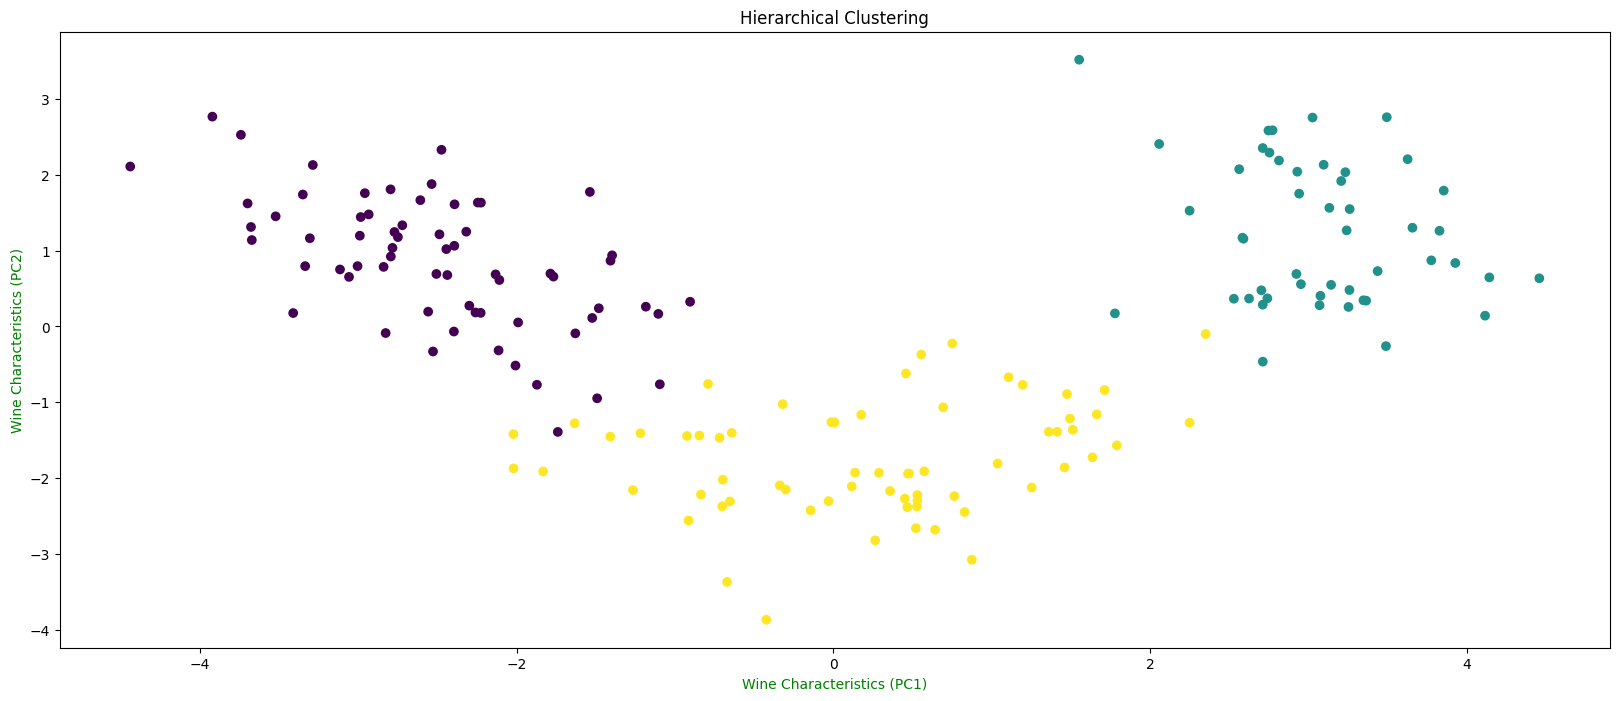

In [18]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Create dendrogram
plt.figure(figsize=(20, 8))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Wine Samples',color='green')
plt.ylabel('Euclidean Distances',color='green')
plt.grid()

# Perform hierarchical clustering
hc = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(df_scaled)

# Visualize the clusters
plt.figure(figsize=(20, 8))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_hc)
plt.title('Hierarchical Clustering')
plt.xlabel('Wine Characteristics (PC1)',color='green')
plt.ylabel('Wine Characteristics (PC2)',color='green')
plt.show()



```
                                                                 SUBMITTED BY: VAMSI KRISHNA GOPIDESI
```

